Tutorials from

* https://www.quanta.guru/docs/circuits/random/random/

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, math, time

from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

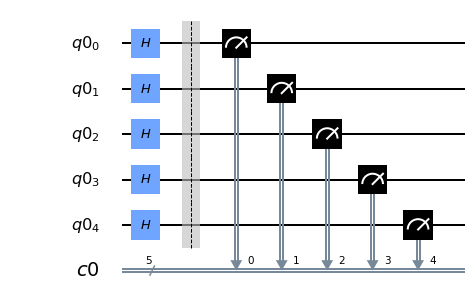

In [3]:
def get_circuit(Nbits):
    q = QuantumRegister(Nbits)
    c = ClassicalRegister(Nbits)
    
    ckt = QuantumCircuit(q, c)
    ckt.h(q)
    ckt.barrier()
    ckt.measure(q,c)
    return ckt

Nbits = 5;
ckt = get_circuit(Nbits)
ckt.draw(output = 'mpl')

In [38]:
ckt=get_circuit(Nbits)
n_qubits = ckt.n_qubits
backend=BasicAer.get_backend("qasm_simulator")
job = execute(ckt, backend=backend, shots=100, memory=True)
res = job.result()
#bit_str = ''.join(job.result().get_memory())
#print (res)


In [59]:
def get_random_Float(ckt, vmin=0., vmax =10.0, size=20 ):
    nbits = 100
    n_qubits = ckt.n_qubits
    #print (n_qubits)
    Nshots = (nbits * size + Nbits -1) // Nbits;
    #print ('Nshots=',Nshots)
    backend=BasicAer.get_backend("qasm_simulator");
    job = execute(ckt, backend=backend, shots=1000, memory=True);
    #print (job.result())
    bit_str = ''.join(job.result().get_memory())
    scale = float(vmax-vmin)/float(2**nbits-1)
    
    random_vec = np.array([ vmin + scale*float(int(bit_str[i:i+nbits], 2)) 
                           for i in range(0, nbits*size, nbits)], 
                          dtype=float)
    
    return random_vec

ckt=get_circuit(Nbits)
Rvec=get_random_Float(ckt)

print (Rvec, len(Rvec))
    
    

[5.9278946  5.91865893 6.21939628 6.70358973 2.21706403 8.93058885
 6.18408872 0.2328439  0.14052377 9.32691826 6.40517463 5.95329754
 0.26550477 8.06644761 4.52738432 6.51336319 4.7573627  8.83689007
 6.3890637  4.82090464] 20


In [68]:
# Draw a sample from uniform distribution.
start_time = time.time()
sample = get_random_Float(ckt, vmin=-7.67, vmax=19.52, size=50)
#sample = uniform_rand_float64(circuit, glo_num_qubits, size=4321, vmin=-7.67, vmax=19.52)
sampling_time = time.time() - start_time

print (sampling_time)



0.03553318977355957


In [ ]:
# Print out some details.
print("Uniform distribution over floating point numbers:")
print("  sample type:", type(sample), ", element type:", sample.dtype,", shape:", sample.shape)

print("  sample min: {:.4f}, max: {:.4f}".format(np.amin(sample), np.amax(sample)))
print("  sampling time: {:.2f} secs".format(sampling_time))

# Plotting the distribution.
plt.hist(sample.ravel(),
         bins=min(int(np.ceil(np.sqrt(sample.size))), 100),
         density=True, facecolor='b', alpha=0.75)
plt.xlabel("value", size=12)
plt.ylabel("probability", size=12)
plt.title("Uniform distribution over float64 numbers in\
                             [{:.2f} ... {:.2f}]".format(
            np.amin(sample), np.amax(sample)), size=12)
plt.grid(True)
# plt.savefig("uniform_distrib_float.png", bbox_inches="tight")
plt.show()